<a href="https://colab.research.google.com/github/JoshriSmritiG/30daysChemML/blob/main/Day1_30dayChemML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install rdkit-pypi

In [62]:
pip install gspread oauth2client pubchempy rdkit pandas scikit-learn matplotlib


In [63]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import pubchempy as pcp
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

In [64]:
!pip install gdown

In [19]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors


In [65]:
sheet_id = "1abUoubFIC0sE3kIZo1cfdwPbehBja47MUOXmAbFRZlo"
sheet_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"
df = pd.read_csv(sheet_url)
print(df.columns)

Index(['Molecule Name', 'SMILES'], dtype='object')


In [46]:
!pip install pubchempy

import pubchempy as pcp

def name_to_smiles(name):
    try:
        compound = pcp.get_compounds(name, 'name')
        if compound:
            return compound[0].isomeric_smiles
    except:
        return None
    return None

df['SMILES'] = df['Molecule Name'].apply(name_to_smiles)
df = df[df['SMILES'].notna()]

In [25]:
from rdkit.Chem import Descriptors

def calc_descriptors(mol):
    if mol is None:
        return [None] * 5
    try:
        return [
            Descriptors.MolWt(mol),
            Descriptors.MolLogP(mol),
            Descriptors.TPSA(mol),
            Descriptors.NumHDonors(mol),
            Descriptors.NumHAcceptors(mol)
        ]
    except:
        return [None] * 5

In [49]:
import pubchempy as pcp
import pandas as pd

In [66]:
sheet_id = "1abUoubFIC0sE3kIZo1cfdwPbehBja47MUOXmAbFRZlo"
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv"
df = pd.read_csv(csv_url)

In [51]:
def get_smiles(name):
    try:
        compound = pcp.get_compounds(name, 'name')
        if compound:
            return compound[0].isomeric_smiles
        else:
            return None
    except:
        return None

In [52]:
!pip install --upgrade gspread gspread_dataframe oauth2client pubchempy

In [67]:
!pip install --upgrade google-auth-httplib2 google-auth-oauthlib
import gspread
from google.colab import auth
from google.auth import default

# Authenticate user and get credentials
auth.authenticate_user()
credentials, _ = default()

# Authorize gspread with the obtained credentials
gc = gspread.authorize(credentials)

In [68]:
spreadsheet = gc.open_by_url("https://docs.google.com/spreadsheets/d/1abUoubFIC0sE3kIZo1cfdwPbehBja47MUOXmAbFRZlo/edit#gid=0")
worksheet = spreadsheet.get_worksheet(0)  # Adjust index if needed (0 = first sheet)


In [54]:
import pandas as pd
from gspread_dataframe import get_as_dataframe, set_with_dataframe
df = get_as_dataframe(worksheet).dropna(how='all')

In [74]:
import pubchempy as pcp

def get_smiles(name):
    try:
        compound = pcp.get_compounds(name, 'name')
        return compound[0].isomeric_smiles if compound else None
    except:
        return None

df['SMILES'] = df['Molecule Name'].apply(get_smiles)


In [43]:
# Find rows with empty SMILES ("" or NaN)
missing_smiles_df = df[df['SMILES'].isna() | (df['SMILES'] == '')]

# Get the molecule names (or any other column, if you have molecule names in a separate column)
missing_smiles_molecules = missing_smiles_df['Molecule Name']  # Assuming the molecule name is in this column

# Print the missing molecules
print(missing_smiles_molecules)


23           β-Ionone
24    γ-Undecalactone
Name: Molecule Name, dtype: object


In [60]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials

In [69]:
# Function to clean up molecule names
def clean_molecule_name(name):
    return name.replace('β', 'Beta').replace('γ', 'Gamma')

# Example: Cleaning the molecule names
cleaned_name = clean_molecule_name('β-Ionone')
print(f"Cleaned name: {cleaned_name}")
cleaned_name = clean_molecule_name('γ-Undecalactone')
print(f"Cleaned name: {cleaned_name}")

Cleaned name: Beta-Ionone
Cleaned name: Gamma-Undecalactone


In [70]:
# Now you can update the cleaned molecule names back into the Google Sheet
for index, row in df.iterrows():
    worksheet.update_cell(index + 2, 1, row['Molecule Name'])

In [71]:
def clean_molecule_name(name):
    # Replace the β and γ with Beta and Gamma
    name = name.replace('β', 'Beta')  # Replace β (Beta symbol) with 'Beta'
    name = name.replace('γ', 'Gamma')  # Replace γ (Gamma symbol) with 'Gamma'

    # Add any other replacements here if necessary
    return name

In [72]:
df['Molecule Name'] = df['Molecule Name'].apply(clean_molecule_name)


In [73]:
for index, row in df.iterrows():
    # Update the first column (adjust if needed)
    worksheet.update_cell(index + 2, 1, row['Molecule Name'])

In [76]:
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools

def calc_descriptors(molecule):
    return {
        'MolWt': Descriptors.MolWt(molecule),
        'LogP': Descriptors.MolLogP(molecule),
        'TPSA': Descriptors.TPSA(molecule),
        'HDonors': Descriptors.NumHDonors(molecule),
        'HAcceptors': Descriptors.NumHAcceptors(molecule)
    }

In [78]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# Assuming 'SMILES' column contains the SMILES strings
df['Mol'] = df['SMILES'].apply(lambda x: Chem.MolFromSmiles(x) if x else None)

df['Descriptors'] = df['Mol'].apply(calc_descriptors)

In [80]:
set_with_dataframe(worksheet, df)

In [81]:
from rdkit.Chem import Descriptors

# Function to calculate the descriptors for each molecule
def calc_descriptors(molecule):
    return {
        'MolWt': Descriptors.MolWt(molecule),
        'LogP': Descriptors.MolLogP(molecule),
        'TPSA': Descriptors.TPSA(molecule),
        'HDonors': Descriptors.NumHDonors(molecule),
        'HAcceptors': Descriptors.NumHAcceptors(molecule)
    }

In [82]:
descriptors_df = df['Mol'].apply(calc_descriptors).apply(pd.Series)
# Apply the function and expand the results into separate columns

In [83]:
# Now, join the descriptors dataframe back to the original dataframe
df = pd.concat([df, descriptors_df], axis=1)

In [84]:
print(df.head())

  Molecule Name                        SMILES  \
0      Caffeine  CN1C=NC2=C1C(=O)N(C(=O)N2C)C   
1         Water                             O   
2     Terpineol          CC1=CCC(CC1)C(C)(C)O   
3       Menthol           CC1CCC(C(C1)O)C(C)C   
4       Acetone                       CC(=O)C   

                                                Mol  \
0  <rdkit.Chem.rdchem.Mol object at 0x780e1f2490e0>   
1  <rdkit.Chem.rdchem.Mol object at 0x780e1f24a420>   
2  <rdkit.Chem.rdchem.Mol object at 0x780e1f249230>   
3  <rdkit.Chem.rdchem.Mol object at 0x780e1f249000>   
4  <rdkit.Chem.rdchem.Mol object at 0x780e1f249700>   

                                         Descriptors    MolWt    LogP   TPSA  \
0  {'MolWt': 194.194, 'LogP': -1.0293, 'TPSA': 61...  194.194 -1.0293  61.82   
1  {'MolWt': 18.015, 'LogP': -0.8247, 'TPSA': 31....   18.015 -0.8247  31.50   
2  {'MolWt': 154.25300000000001, 'LogP': 2.503700...  154.253  2.5037  20.23   
3  {'MolWt': 156.26899999999998, 'LogP': 2.439500...  

In [85]:
set_with_dataframe(worksheet, df)

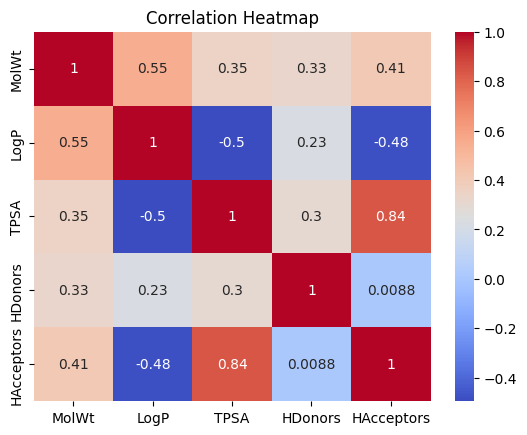

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting a correlation heatmap
corr = df[['MolWt', 'LogP', 'TPSA', 'HDonors', 'HAcceptors']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


From the Heat map
There is a significant positive correlation between the logP value and the Mol wt = 0.55
Which can explain why enzymes of large molecular weight are lipophilic in nature.
There is also significant correlation between the Mol Wt and TPSA.


In [99]:
def classify_polarity(tpsa, logp):
    if tpsa > 60 and logp < 1:
        return 'Polar'
    elif 20 < tpsa <= 70 and 0 <= logp <= 3:
        return 'Moderately Polar'
    elif tpsa < 40 and logp > 3:
        return 'Non-Polar'
    else:
        return 'Unclassified'  # For any molecules that don’t fit neatly

In [88]:
df['Polarity'] = df.apply(lambda row: classify_polarity(row['TPSA'], row['LogP']), axis=1)

In [104]:
df['Is_Polar'] = df['Polarity'] == 'Polar'
df['Is_MPolar'] = df['Polarity'] == 'Moderately Polar'
df['Is_NonPolar'] = df['Polarity'] == 'Non-Polar'
print(df[['Molecule Name', 'TPSA', 'LogP', 'Polarity']].head())

  Molecule Name   TPSA    LogP      Polarity
0      Caffeine  61.82 -1.0293         Polar
1         Water  31.50 -0.8247  Unclassified
2     Terpineol  20.23  2.5037        MPolar
3       Menthol  20.23  2.4395        MPolar
4       Acetone  17.07  0.5953  Unclassified


In [105]:
set_with_dataframe(worksheet, df)

In [110]:
unclassified_molecules = df[df['Polarity'] == 'Unclassified']
print(unclassified_molecules[['Molecule Name', 'TPSA', 'LogP']])

Empty DataFrame
Columns: [Molecule Name, TPSA, LogP]
Index: []


In [106]:
def classify_polarity(tpsa, logp):
    if tpsa >= 60:
        return 'Polar'
    elif tpsa >= 20:
        return 'MPolar'
    else:
        return 'NPolar'

In [107]:
df['Polarity'] = df.apply(lambda row: classify_polarity(row['TPSA'], row['LogP']), axis=1)

In [108]:
df['Is_Polar'] = df['Polarity'] == 'Polar'
df['Is_MPolar'] = df['Polarity'] == 'Moderately Polar'
df['Is_NonPolar'] = df['Polarity'] == 'Non-Polar'
print(df[['Molecule Name', 'TPSA', 'LogP', 'Polarity']].head())

  Molecule Name   TPSA    LogP Polarity
0      Caffeine  61.82 -1.0293    Polar
1         Water  31.50 -0.8247   MPolar
2     Terpineol  20.23  2.5037   MPolar
3       Menthol  20.23  2.4395   MPolar
4       Acetone  17.07  0.5953   NPolar


In [112]:
set_with_dataframe(worksheet, df)

In [113]:
# Filter compounds likely to be biologically active
bioactive_df = df[(df['HDonors'] <= 5) & (df['HAcceptors'] <= 10)]

# Display the likely biologically active compounds
bioactive_df[['Molecule Name', 'HDonors', 'HAcceptors']]

,Molecule Name,HDonors,HAcceptors
0,Caffeine,0.0,6.0
1,Water,0.0,0.0
2,Terpineol,1.0,1.0
3,Menthol,1.0,1.0
4,Acetone,0.0,1.0
5,Limonene,0.0,0.0
6,Citronellol,1.0,1.0
7,"(Z,Z)-3,6-nonadien-1-ol",1.0,1.0
8,Isoamyl acetate,0.0,2.0
9,Linalool,1.0,1.0


In [114]:
bioactive_df['H_Bond_Capacity'] = bioactive_df['HDonors'] + bioactive_df['HAcceptors']
bioactive_df.sort_values(by='H_Bond_Capacity', ascending=False)

,Molecule Name,SMILES,Mol,Descriptors,MolWt,LogP,TPSA,HDonors,HAcceptors,Polarity,Is_Polar,Is_MPolar,Is_NonPolar,H_Bond_Capacity
0,Caffeine,CN1C=NC2=C1C(=O)N(C(=O)N2C)C,<rdkit.Chem.rdchem.Mol object at 0x780e1f2490e0>,"{'MolWt': 194.194, 'LogP': -1.0293, 'TPSA': 61...",194.194,-1.02930,61.82,0.0,6.0,Polar,True,False,False,6.0
11,Zingerone,CC(=O)CCC1=CC(=C(C=C1)O)OC,<rdkit.Chem.rdchem.Mol object at 0x780e1f249690>,"{'MolWt': 194.23, 'LogP': 1.9223999999999997, ...",194.230,1.92240,46.53,1.0,3.0,MPolar,False,False,False,4.0
20,Vanillin,COC1=C(C=CC(=C1)C=O)O,<rdkit.Chem.rdchem.Mol object at 0x780e1f249a10>,"{'MolWt': 152.14899999999997, 'LogP': 1.2133, ...",152.149,1.21330,46.53,1.0,3.0,MPolar,False,False,False,4.0
25,Methyl anthranilate,COC(=O)C1=CC=CC=C1N,<rdkit.Chem.rdchem.Mol object at 0x780e1f249cb0>,"{'MolWt': 151.16499999999996, 'LogP': 1.0554, ...",151.165,1.05540,52.32,1.0,3.0,MPolar,False,False,False,4.0
21,Methyl salicylate,COC(=O)C1=CC=CC=C1O,<rdkit.Chem.rdchem.Mol object at 0x780e1f249a80>,"{'MolWt': 152.14899999999997, 'LogP': 1.178799...",152.149,1.17880,46.53,1.0,3.0,MPolar,False,False,False,4.0
30,Guaiacol,COC1=CC=CC=C1O,<rdkit.Chem.rdchem.Mol object at 0x780e1f249380>,"{'MolWt': 124.13899999999997, 'LogP': 1.4008, ...",124.139,1.40080,29.46,1.0,2.0,MPolar,False,False,False,3.0
10,Eugenol,COC1=C(C=CC(=C1)CC=C)O,<rdkit.Chem.rdchem.Mol object at 0x780e1f249620>,"{'MolWt': 164.20399999999998, 'LogP': 2.1293, ...",164.204,2.12930,29.46,1.0,2.0,MPolar,False,False,False,3.0
29,Thymol,CC1=CC(=C(C=C1)C(C)C)O,<rdkit.Chem.rdchem.Mol object at 0x780e1f249e70>,"{'MolWt': 150.22099999999998, 'LogP': 2.824020...",150.221,2.82402,20.23,1.0,1.0,MPolar,False,False,False,2.0
2,Terpineol,CC1=CCC(CC1)C(C)(C)O,<rdkit.Chem.rdchem.Mol object at 0x780e1f249230>,"{'MolWt': 154.25300000000001, 'LogP': 2.503700...",154.253,2.50370,20.23,1.0,1.0,MPolar,False,False,False,2.0
3,Menthol,CC1CCC(C(C1)O)C(C)C,<rdkit.Chem.rdchem.Mol object at 0x780e1f249000>,"{'MolWt': 156.26899999999998, 'LogP': 2.439500...",156.269,2.43950,20.23,1.0,1.0,MPolar,False,False,False,2.0


In [115]:
df.drop(columns=['Is_Polar', 'Is_MPolar', 'Is_NonPolar'], inplace=True)

In [116]:
def classify_bioactivity(row):
    if row['HDonors'] <= 5 and row['HAcceptors'] <= 10:
        return 'Active'
    else:
        return 'Not Active'
df['Biological_Activity'] = df.apply(classify_bioactivity, axis=1)

In [117]:
set_with_dataframe(worksheet, df)